In [2]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pathlib
import tikzplotlib
from collections import defaultdict


In [3]:
print(tikzplotlib.Flavors.latex.preamble())

\documentclass{standalone}
\usepackage[utf8]{inputenc}
\usepackage{pgfplots}
\DeclareUnicodeCharacter{2212}{−}
\usepgfplotslibrary{groupplots,dateplot}
\usetikzlibrary{patterns,shapes.arrows}
\pgfplotsset{compat=newest}



In [4]:
# mpl.use("pgf")
# mpl.rcParams.update({
    # "pgf.texsystem": "pdflatex",
    # 'font.family': 'serif',
    # 'text.usetex': True,
    # 'pgf.rcfonts': False,
# })

In [5]:
def read_jsons():

    data = defaultdict(lambda: [])
    # Read jsons files of build/semana03/circles with pathlib
    jsons = list(pathlib.Path("../build/semana03/circles").glob("*.json"))
    jsons += list(pathlib.Path("../build/semana04/circles").glob("*.json"))
    jsons.sort()
    print(jsons)
    
    for json_file in jsons:
        with open(json_file, "r") as f:
            json_values = json.load(f)
            for key in ["n", "time", "h", "algorithm"]:
                data[key].append(json_values[key])

    
    # Change values n3 to $O(n^3)$ on algorithm column
    data["algorithm"] = ["Segmentos" if x == "n3" else x for x in data["algorithm"]]
    data["algorithm"] = ["Triangulos" if x == "naive" else x for x in data["algorithm"]]
    data["algorithm"] = ["Jarvis" if x == "jarvis" else x for x in data["algorithm"]]

    

    return pd.DataFrame(data)



In [6]:
df = read_jsons()

[PosixPath('../build/semana03/circles/random_jarvis_1000000_1.json'), PosixPath('../build/semana03/circles/random_jarvis_1000000_2.json'), PosixPath('../build/semana03/circles/random_jarvis_1000000_3.json'), PosixPath('../build/semana03/circles/random_jarvis_1000000_4.json'), PosixPath('../build/semana03/circles/random_jarvis_1000000_5.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_1.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_2.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_3.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_4.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_5.json'), PosixPath('../build/semana03/circles/random_jarvis_10000_1.json'), PosixPath('../build/semana03/circles/random_jarvis_10000_2.json'), PosixPath('../build/semana03/circles/random_jarvis_10000_3.json'), PosixPath('../build/semana03/circles/random_jarvis_10000_4.json'), PosixPath('../build/semana03/circles/random_ja

[PosixPath('../build/semana03/circles/random_jarvis_1000000_1.json'), PosixPath('../build/semana03/circles/random_jarvis_1000000_2.json'), PosixPath('../build/semana03/circles/random_jarvis_1000000_3.json'), PosixPath('../build/semana03/circles/random_jarvis_1000000_4.json'), PosixPath('../build/semana03/circles/random_jarvis_1000000_5.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_1.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_2.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_3.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_4.json'), PosixPath('../build/semana03/circles/random_jarvis_100000_5.json'), PosixPath('../build/semana03/circles/random_jarvis_10000_1.json'), PosixPath('../build/semana03/circles/random_jarvis_10000_2.json'), PosixPath('../build/semana03/circles/random_jarvis_10000_3.json'), PosixPath('../build/semana03/circles/random_jarvis_10000_4.json'), PosixPath('../build/semana03/circles/random_ja

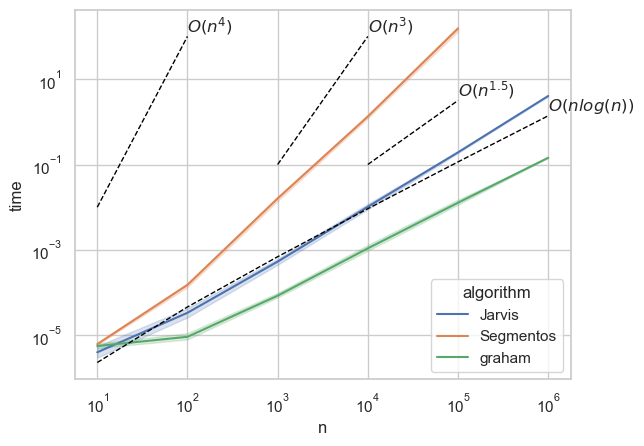

In [12]:
fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sns.lineplot(data=read_jsons(), x="n", y="time", hue="algorithm", ax=ax)
ax.set(xscale="log", yscale="log")

# Plot y = nˆ4
xs = [10, 100]; ys = [1e-2, 1e2]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^4)$", fontsize=12, verticalalignment="bottom")

xs = [1000, 10000]; ys = [1e-1, 1e2]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^3)$", fontsize=12, verticalalignment="bottom")

# xs = [10000, 100000]; ys = [1e-1, 1e+1]
# ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
# ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

xs = [10000, 100000]; ys = [1e-1, math.pow(10, -1+1.5)]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{1.5})$", fontsize=12, verticalalignment="bottom")

xs = [math.pow(10, i) for i in range(1, 7)]
ys = [x*math.log(x)/10000000 for x in xs]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(nlog(n))$", fontsize=12, verticalalignment="bottom")
plt.show()